In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [39]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [40]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [41]:
'{:%B %Y}'.format(curr_month)

'September 2017'

<h2>Основная таблица</h2>

In [44]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [45]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-09-30     -228   -296        -36 -68   0     9     33     -46     -15

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

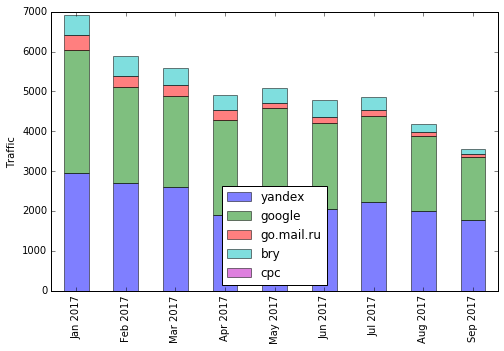

In [46]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

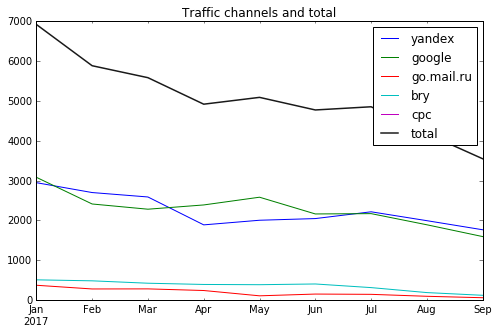

In [47]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [24]:
kw = 'keyword visit'.split()

In [48]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing   0                                          двери верда     13
       1                                   двери с фурнитурой     13
       2                                       двери недорого     10
       3                                     двери со скидкой      7
       4                               входные двери недорого      6
       5                                      двери в наличии      6
       6                                       двери гармошка      6
       7                                   двери межкомнатные      6
       8                                дешевые входные двери      5
       9                                   межкомнатные двери      5
       10                                        двери книжка      4
       11                                      двери под ключ      4
       12                                   двери белорусские      3
       13                      двери с доставкой и установкой      3
       14                                              amazon      2
       15                                              np - /      2
       16                           np - /?cnt=catalog&r=1428      2
       17                                          двери купе      2
       18                                 двери металлические      2
       19                                    двери со стеклом      2
       20                                        двери эконом      2
       21                                       двери экошпон      2
       22                                 двери эмалированные      2
       23                                   арки межкомнатные      1
       24                                  входные двери цена      1
       25                                    двери в балашихе      1
       26                                      двери складные      1
       27                         межеомнатные двери складные      1
       28                        межкомнатные двери с замками      1
       29                                         серые двери      1
...                                                       ...    ...
yandex 616                     сдвижная дверь на кухню размер      1
       617                           сдвижные двери для кухни      1
       618                            сдвижные двери на кухню      1
       619                            сдвижные двери на кухню      1
       620                           складные двери для кухни      1
       621     сколько стоит ажурное стекло в кухонных дверях      1
       622                          скрытые дверные механизмы      1
       623         ставят ли на кухонную дверь ручку с замком      1
       624      стандартный размер дверного полотна в комнату      1
       625                          стандарты дверных полотен      1
       626                            стекло в кухонную дверь      1
       627                     стекло в кухонную дверь купить      1
       628                          стеклянная дверь на кухню      1
       629                     стеклянная дверь на кухню фото      1
       630                    стеклянные двери для кухни фото      1
       631             стеклянные двери для кухни фото и цены      1
       632                     стеклянные двери на кухню фото      1
       633                     стеклянные двери на кухню фото      1
       634  стеклянные полотна для дверей с термически пол...      1
       635                            стильные кухонные двери      2
       636                 строительный магазин дверные петли      1
       637                   типы заполнения дверного полотна      1
       638                        толщина полотна двери 30 мм      1
       639                 уаз патриот аксессуары ручки двери      1
       640           узкие дверные полотна из дерева недорого      1
       641  уличная дверное полотно 2000х1000 стекло и мет...      1
       642  хочу поставить дверь на кухню какое може

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [49]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери верда,13
go.mail.ru,(not set),62
google,np - /?cnt=catalog&r=2438,193
rambler,двери мильяна hd купить по самой маленькой цене,1
yahoo,np - /,2
yandex,(not set),1073


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [50]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                      двери верда     13
           1                               двери с фурнитурой     13
           2                                   двери недорого     10
           3                                 двери со скидкой      7
           4                           входные двери недорого      6
go.mail.ru 0                                        (not set)     62
google     0                        np - /?cnt=catalog&r=2438    193
           1                                 np - /?pid=pokaz    107
           2                                           np - /     96
           3                        np - /?cnt=catalog&r=1428     84
           4                                    полотно двери     74
rambler    0  двери мильяна hd купить по самой маленькой цене      1
           1            купить дверную коробку красное дерево      1
           2         межкомнатные двери с установкой под ключ      1
           3                            складные двери купить      1
           4                                 эльдорф баден 03      1
yahoo      0                                           np - /      2
yandex     0                                        (not set)   1073
           1                                     took-took.ru      4
           2                             двери тук-тук москва      3
           3                                    двери тук тук      2
           4                  интернет-магазин дверей тук-тук      2